<a href="https://colab.research.google.com/github/geun-hyoung/StockPredictionByTextMining/blob/main/txt_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nltk

In [80]:
import pandas as pd
file_path = "combined_news_data.xlsx"
# tf_idf_result_path = "tf_idf_results.xlsx"

df = pd.read_excel(file_path)
sentences = df['Description']
# newspaper = pd.read_excel(file_path)['Publisher']
# year =  pd.read_excel(file_path)['Year']
df

,Publisher,Date,Title,Description
0,"{'href': 'https://www.theguardian.com', 'title...","Thu, 02 Jan 2020 08:00:00 GMT",Tesla may have been on Autopilot in California...,Tesla may have been on Autopilot in California...
1,"{'href': 'https://carbuzz.com', 'title': 'CarB...","Wed, 01 Jan 2020 08:00:00 GMT",Tesla Cybertruck Makes Music Video Debut - Car...,Tesla Cybertruck Makes Music Video Debut CarBuzz
2,"{'href': 'https://carbuzz.com', 'title': 'CarB...","Wed, 01 Jan 2020 08:00:00 GMT",All-New Tesla Model S Could Look Like This - C...,All-New Tesla Model S Could Look Like This Ca...
3,"{'href': 'https://en.globes.co.il', 'title': '...","Wed, 01 Jan 2020 08:00:00 GMT",Tesla setting up Israel R&D office - Globes - ...,Tesla setting up Israel R&D office - Globes G...
4,"{'href': 'https://electrek.co', 'title': 'Elec...","Wed, 01 Jan 2020 08:00:00 GMT",Tesla updates 2020 Supercharger map with new l...,Tesla updates 2020 Supercharger map with new l...
...,...,...,...,...
17781,"{'href': 'https://www.torquenews.com', 'title'...","Sat, 01 Oct 2022 07:00:00 GMT",What A Tesla Model 3 Could Mean For You - Torq...,What A Tesla Model 3 Could Mean For You Torqu...
17782,"{'href': 'https://www.hindustantimes.com', 'ti...","Sun, 02 Oct 2022 07:00:00 GMT",Want to work for Tesla? Elon Musk tweets askin...,Want to work for Tesla? Elon Musk tweets askin...
17783,"{'href': 'https://cnnespanol.cnn.com', 'title'...","Sat, 01 Oct 2022 07:00:00 GMT",El robot de Tesla caminó lentamente sobre el e...,El robot de Tesla caminó lentamente sobre el e...
17784,"{'href': 'https://www.thestreet.com', 'title':...","Sat, 01 Oct 2022 07:00:00 GMT",New Electric Vehicle Beats Tesla When it Comes...,New Electric Vehicle Beats Tesla When it Comes...


In [81]:
# Year 열 날짜 변환

# from datetime import datetime

# date_result = []
# for d in year:
#   d =d.replace(","," ")
#   d = ' '.join(d.split()[0:3])

#   date_result.append(datetime.strptime(d, '%d %b %Y').strftime('%Y-%m-%d'))


df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.strftime('%Y.%m.%d')

df['Date']

0        2020.01.02
1        2020.01.01
2        2020.01.01
3        2020.01.01
4        2020.01.01
            ...    
17781    2022.10.01
17782    2022.10.02
17783    2022.10.01
17784    2022.10.01
17785    2022.10.01
Name: Date, Length: 17786, dtype: object

In [82]:
df = df.sort_values(by='Date')
df

,Publisher,Date,Title,Description
1,"{'href': 'https://carbuzz.com', 'title': 'CarB...",2020.01.01,Tesla Cybertruck Makes Music Video Debut - Car...,Tesla Cybertruck Makes Music Video Debut CarBuzz
2,"{'href': 'https://carbuzz.com', 'title': 'CarB...",2020.01.01,All-New Tesla Model S Could Look Like This - C...,All-New Tesla Model S Could Look Like This Ca...
3,"{'href': 'https://en.globes.co.il', 'title': '...",2020.01.01,Tesla setting up Israel R&D office - Globes - ...,Tesla setting up Israel R&D office - Globes G...
4,"{'href': 'https://electrek.co', 'title': 'Elec...",2020.01.01,Tesla updates 2020 Supercharger map with new l...,Tesla updates 2020 Supercharger map with new l...
0,"{'href': 'https://www.theguardian.com', 'title...",2020.01.02,Tesla may have been on Autopilot in California...,Tesla may have been on Autopilot in California...
...,...,...,...,...
16961,"{'href': 'https://www.kiplinger.com', 'title':...",2023.08.31,EV Tax Credit 2023: Everything You Need to Kno...,EV Tax Credit 2023: Everything You Need to Kno...
7348,"{'href': 'https://www.geo.de', 'title': 'GEO.de'}",2023.11.16,Europas Silvesterfluchten: Ruhige Ziele zum Ja...,Europas Silvesterfluchten: Ruhige Ziele zum Ja...
1227,"{'href': 'https://www.netzwelt.de', 'title': '...",2023.11.21,Liebe braucht keine Ferien | Sendetermine & St...,Liebe braucht keine Ferien | Sendetermine & St...
12743,"{'href': 'https://www.autovisie.nl', 'title': ...",2023.11.21,Waarom je in de wasstraat nooit het dure progr...,Waarom je in de wasstraat nooit het dure progr...


In [83]:

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [88]:

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import EnglishStemmer
from nltk.stem.lancaster import LancasterStemmer
lemmatizer = WordNetLemmatizer()
# stemmer = EnglishStemmer()
# stemmer = LancasterStemmer()
# stemmer = nltk.stem.PorterStemmer()
# lemmatizer = WordNetLemmatizer()

noun_words = ['cruise','combusiness', 'future','beans', 'murphy','crisis','rockets',
              'producevehicle','games','airlines','operators','facilities','scrutiny',
              'endorsement', 'warranty', 'excellence','videos','claims','masks','nations','vehicles','ploblems','photos',
              'sits','relations','covers','hands','tensions','capabilities','nations','requests','endorsements',
              'teams', 'ploblems','areas','streets','signs','possiblities','workers','sales','adopters','developments',
              'companies','clubs','dashboards','powerwalls','panalties','challenges','tasks','machines','households',
              'negotiations','politics','overseas','homeowners','wars','movies','autospies','paneles','withdraws',
              'margins','automakers','nuevos','flaws','deepfakes','believers','angeles','spacers','deliveries','fails']
verb_words = ['have','waived','involving','abundoning','contribute','engaged','recalled','intensifying','led','curves',
              'received', 'charges', 'investigating', 'intensifying', 'said','retreating','considering','remains','began','displayed',
              'fired','lined','depanding','blamed','killing','sitting','opted','enticing','reviewing','contends','missed','balancing',
              'anticipated','jumped','delievered','shifted','killed','concerning','arrived','defects','argued','disclosed',
              'explained','appears','stopped','depending','battered','thinking','pressured','slowing','tumbling','tensifying',
              'explained','restarts','admitted','demands','totaled','demonstrates','opposing','interested','acting','taken','braking',
              'peaking','dethroned','met','guessed','developer','outstanding','performing','loaded','rides','launched','allows',
              'thrilled','operated','refusing','slumped','affected','appeared','removing','saying','related','troubled',
              'advanced','raised','killed','defects','crewed','performing','leaving','got','explains','raising',
              'inspires','injured','sales','powered','pulled','cutting','fleeing','creating','growing','coming',
              'leasing','promising','revealed','nailed','did','linking','tuned','optimizes','badged',
              'receives','patched','encourageing','thought','recommends','combined','endangered','counterfeiting',
              'challenging','owned','missing','creates','closing','won','hinting','billing','rolling','nears','breaking','given',
              'commemorating','receiving','going','targeted','kicking','replaced','seeking','promotes','taking',
              'stealing','spotted','celebrating','extended','preserving','allows','cutting','including','positioning',
              'extends','enabled','fixing','replacing','promotes','sends','flying','replanting','responds','rumoured',
              'installed','inspired','isolating','designed','earnings','jolted','adding','picking','running','rolls',
              'acquires','electrifying','sustaining','redesigned','committed','branded','launched','prepares','worked',
              'zoomed','shares','earnings','confirmed','making']
adject_words = ['nearest','safer','older','worse','slower','lower','hottest','coolest','effectively','originally','cheaper']

# 단어 전처리 함수
def preprocess_word(text):
    text = text.lower()
    # 단어 단위로 분리
    # words = text.split()
    # print(words)
    # 각 단어에 lemmatization 적용
    # lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    tokens = nltk.word_tokenize(text)

    # 여러 개의 특정 단어를 명사로 표제어 추출
    tokens = [lemmatizer.lemmatize(word, pos='n') if word in noun_words else word for word in tokens]
    # 여러 개의 특정 단어를 동사로 표제어 추출
    tokens = [lemmatizer.lemmatize(word, pos='v') if word in verb_words else word for word in tokens]
    # 여러 개의 특정 단어를 형용사로 표제어 추출
    tokens = [lemmatizer.lemmatize(word, pos='a') if word in adject_words else word for word in tokens]

    # 다시 문장으로 결합
    # lemmatized_text = ' '.join(lemmatized_words)
    # stemmered_text = ' '.join(stemmered_words)
    return ' '.join(tokens)



In [85]:
lemmatizer.lemmatize('earnings', pos='v')

'earn'

In [86]:


# 불용어
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
custom_stop_words = set(ENGLISH_STOP_WORDS)

# 추가적인 불용어 카테고리별로 설정
general_stopwords = ['with', 'was', 'will', 'why', 'what', 'you', 'your', 'who', 'yet', 'years', 'world', 'working', 'work', 'we', 'when']
brand_stopwords = ['tesla', 'volvo', 'volkswagen', 'xpeng']
tech_stopwords = ['video', 'updates', 'youtuber', 'youtube', 'windows', 'wifi', 'wireless', 'watching', 'watch', 'windowbreaking', 'window', 'wing']
car_stopwords = ['vehicles', 'truckers', 'transportation', 'trucks', 'vehicle']
date_stopwords = ['january', 'fabruary', 'march','april','may','june','july','agust','september','october','november','december']
other_stopwords = ['do']

# 모든 추가 불용어를 한 리스트에 합치기
all_additional_stopwords = general_stopwords + brand_stopwords + tech_stopwords + car_stopwords+date_stopwords + other_stopwords

for stopword in all_additional_stopwords:
  custom_stop_words.add(stopword)


In [89]:
# 문장 전처리 적용
# processed_sentences = [preprocess_word(sentence) for sentence in sentences]
# print(processed_sentences)

# tfidf
vectorizer = TfidfVectorizer(max_features=None,token_pattern=r'\b[a-zA-Z]{3,}\b',
                             stop_words=list(custom_stop_words),preprocessor=preprocess_word)
# r'\b[a-zA-Z]{3,}\b'
# ,preprocessor=preprocess_word

X = vectorizer.fit_transform(sentences)

# 단어 목록
feature_names = vectorizer.get_feature_names_out()
# print(feature_names)

tfidf_df = pd.DataFrame(X.toarray(), columns=feature_names)
# print(tfidf_df)

# 결과를 엑셀 파일로 저장
# tfidf_df.to_excel('tfidf_results.xlsx', index=True)

# print(tfidf_df)
tfidf_df


,aaa,aaditya,aaj,aan,aandeel,aankoopadvies,aantal,aap,aapl,aave,...,zugang,zuhause,zukunft,zulassungen,zum,zur,zurich,zweeds,zwei,zwischen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


model          581.061334
musk           342.216503
elon           309.424566
car            239.958707
news           232.804737
                  ...    
puas             0.269249
jajan            0.269249
gepachtet        0.265667
techbranche      0.265667
bricht           0.265667
Length: 18507, dtype: float64


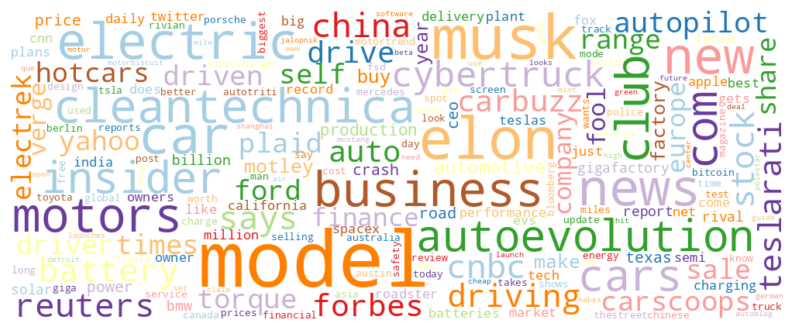

In [90]:
### 워드 클라우드

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 워드 클라우드 생성 함수
def generate_wordcloud(tfidf_df):
    # 단어와 해당하는 TF-IDF 값을 딕셔너리로 변환

    tfidf_counter = tfidf_df.T.sum(axis=1)
    print(tfidf_counter.sort_values(ascending=False))
    # 워드 클라우드 생성
    wordcloud = WordCloud(width=1000, height=400, background_color='white',min_font_size=5,max_font_size=100,colormap = "Paired").generate_from_frequencies(tfidf_counter)

    # 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_wordcloud(tfidf_df)



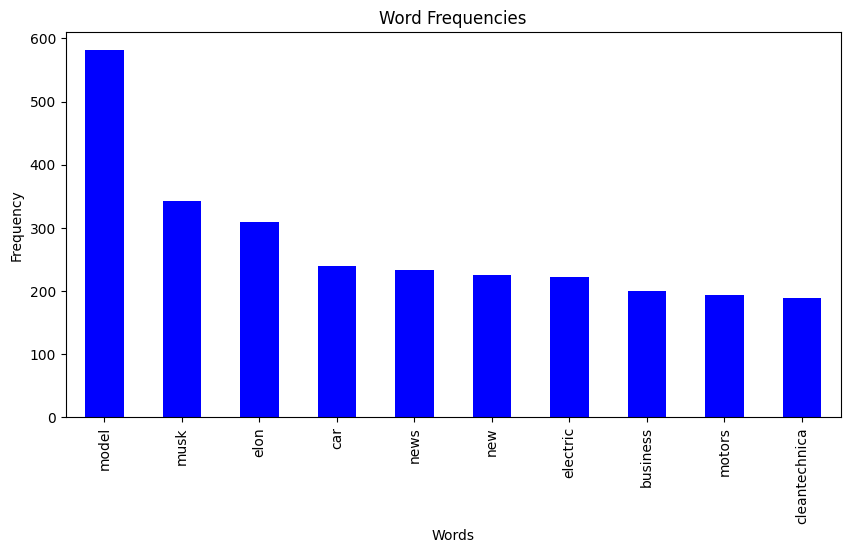

In [140]:
### 빈도분석

word_frequencies = tfidf_df.sum()
top_words = word_frequencies.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_words.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [91]:

# 문장에서 상위 키워드 추출 함수
def extract_keywords(sentence, all_keywords, max_keywords=None):
    tfidf_values = vectorizer.transform([sentence]).toarray()[0]
    sorted_indices = tfidf_values.argsort()[-max_keywords:][::-1]
    keywords = [all_keywords[idx] for idx in sorted_indices]
    return ', '.join(keywords)

# 문장을 벡터화하여 모든 키워드 추출
all_keywords = vectorizer.get_feature_names_out()

# # 키워드 분석 결과 얻기
# keywords_per_sentence = [extract_keywords(sentence, all_keywords, max_keywords=5) for sentence in sentences]
# keywords_per_sentence

In [92]:
import numpy as np
# 엑셀 파일에 결과 추가 함수
def add_results_to_excel(sentences, excel_filename):
    # 감성 분석 결과 얻기
    # sentiments = sentiment_analysis(sentences)

    # TF-IDF 분석 결과 얻기

    # 키워드 분석 결과 얻기
    keywords_per_sentence = [extract_keywords(sentence, all_keywords, max_keywords=5) for sentence in sentences]

    # 뉴스 -키워드 데이터 엑셀로
    results_1 = pd.DataFrame({
        'Sentences': sentences,
        'Keywords' : keywords_per_sentence
    })
    results_1.to_excel('News_Keys_results.xlsx', index = False)

    # 결과를 DataFrame으로 변환
    # results_df = pd.DataFrame({
    #     'Newspaper': newspaper,
    #     'Year' : date_result,
    #     'Sentences': sentences,
    #     'Sentiment': sentiments,
    #     'Keywords' : keywords_per_sentence
    # })

    # 결과를 엑셀 파일에 저장
    # results_df.to_excel(excel_filename, index=False)

# 엑셀 파일에 결과 추가
add_results_to_excel(sentences, 'analysis_results.xlsx')

----------------------
날짜별 키워드 추출

In [93]:
# 날짜별 키워드

date_keyword_result = {
    'Date': df['Date'],
    'Sentences': sentences
}

dk_df = pd.DataFrame(date_keyword_result)

grouped_data = dk_df.groupby('Date')['Sentences'].apply(lambda x: ', '.join(x)).reset_index()

grouped_data.to_excel('date_text.xlsx', index = False)
grouped_data

,Date,Sentences
0,2020.01.01,Tesla Cybertruck Makes Music Video Debut CarB...
1,2020.01.02,Tesla may have been on Autopilot in California...
2,2020.01.03,"Tesla to provide movies, online games in its c..."
3,2020.01.04,I-70 crash one of 3 raising questions about Te...
4,2020.01.05,Minimalist Tesla Cybertruck Inspires Russian '...
...,...,...
1104,2023.08.09,9 Mejores Brokers España para Invertir en Bols...
1105,2023.08.31,EV Tax Credit 2023: Everything You Need to Kno...
1106,2023.11.16,Europas Silvesterfluchten: Ruhige Ziele zum Ja...
1107,2023.11.21,Liebe braucht keine Ferien | Sendetermine & St...


In [94]:
# tfidf_date = tfidf_analysis(sentences, max_features=None)
# tfidf_date
# sentence_date = grouped_data['Grouped Sentences'].to_string()
# print(sentence_date)
keywords_per_date_sentence = [extract_keywords(sentence, all_keywords, max_keywords=10)  for sentence in grouped_data['Sentences']]

date_keyword_result = pd.DataFrame({
    'Date': grouped_data['Date'],
    # 'Sentences': grouped_data['Grouped Sentences'],
    'Keywords' : keywords_per_date_sentence
})
date_keyword_result
date_keyword_result.to_excel('date_keywords_results.xlsx', index = False)

----

감성분석 결과 추가

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
from textblob import TextBlob

In [ ]:
from textblob import TextBlob

# # 감성 분석 함수
# def sentiment_analysis(sentences):
#     sentiments = []
#     for sentence in sentences:
#         blob = TextBlob(sentence)
#         sentiment = blob.sentiment.polarity  # -1에서 1까지의 값을 반환
#         sentiments.append(sentiment)
#     return sentiments

# sentiments = sentiment_analysis(sentences)

# print(sentiments)


In [96]:

from collections import defaultdict
from textblob import TextBlob

# 감성분석 점수 및 키워드를 저장할 딕셔너리 초기화
description_sentiment_scores = defaultdict(float)
keywords_sentiment_scores = defaultdict(float)
keywords_dict = defaultdict(list)

# 감성 단어 개수를 저장할 딕셔너리 초기화
description_uncertainty_count = defaultdict(int)
description_litigious_count = defaultdict(int)
description_constraining_count = defaultdict(int)
description_superfluous_count = defaultdict(int)
description_weakmodal_count = defaultdict(int)
description_positive_count = defaultdict(int)
description_negative_count = defaultdict(int)

keywords_uncertainty_count = defaultdict(int)
keywords_litigious_count = defaultdict(int)
keywords_constraining_count = defaultdict(int)
keywords_superfluous_count = defaultdict(int)
keywords_weakmodal_count = defaultdict(int)
keywords_positive_count = defaultdict(int)
keywords_negative_count = defaultdict(int)

# Loughran-McDonald 사전 로드
sentiment_df = pd.read_csv('LM-SA-2020.csv')

# 감성별 사전 초기화
uncertainty_dict = defaultdict(int)
litigious_dict = defaultdict(int)
constraining_dict = defaultdict(int)
superfluous_dict = defaultdict(int)
weakmodal_dict = defaultdict(int)
positive_dict = defaultdict(int)
negative_dict = defaultdict(int)

for _, row in sentiment_df.iterrows():
    word, sentiment = row['word'], row['sentiment']
    if sentiment == 'Uncertainty':
        uncertainty_dict[word] = 1
    elif sentiment == 'Litigious':
        litigious_dict[word] = 1
    elif sentiment == 'Constraining':
        constraining_dict[word] = 1
    elif sentiment == 'Superfluous':
        superfluous_dict[word] = 1
    elif sentiment == 'WeakModal':
        weakmodal_dict[word] = 1
    elif sentiment == 'Positive':
        positive_dict[word] = 1
    elif sentiment == 'Negative':
        negative_dict[word] = -1

# 감성 분석 함수
def sentiment_analysis(sentence, sentiment_dict):
    words = sentence.split()
    sentiment_score = sum(sentiment_dict[word] for word in words if word in sentiment_dict)
    return sentiment_score

# 감성 단어 개수를 세는 함수
def count_sentiment_words(sentences, sentiment_dict):
    count = 0
    for sentence in sentences:
        words = sentence.split()
        count += sum(1 for word in words if word in sentiment_dict)
    return count

# 날짜별로
for date, group in df.groupby('Date'):
    # 'Description' 컬럼이 비어 있지 않은 경우만 처리
    if not group['Description'].isna().all():
      descriptions = group['Description']
        # 불용어로만 이루어진 문장을 제외
      descriptions = [desc for desc in descriptions if not all(word in ENGLISH_STOP_WORDS for word in desc.split())]
      if descriptions:

        # 그룹의 Description을 합친 텍스트를 TF-IDF 변환
        tfidf = vectorizer.fit_transform(descriptions)

        # TF-IDF 값이 높은 5개의 키워드 추출
        keywords = [word for word, score in sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1], reverse=True)[:5]]
        keywords_dict[date] = keywords

        senti_sc = list(sentiment_analysis(keyword, sentiment) for keyword in keywords)
        # flat_list = [item for sublist in senti_sc for item in sublist]
        # print(flat_list)
        # 감성분석 점수 계산 (키워드의 감성 점수 합)
        # sentiment_scores[date] = sum(senti_sc)
        keywords_sentiment_scores[date] = sum(sum(sentiment_analysis(keyword, sentiment) for sentiment in [positive_dict, negative_dict]) for keyword in keywords)
        # print(sentiment_scores[date])

        # 'Description'의 전체 텍스트를 대상으로 한 감성분석 점수 계산 후 소수점 5째 자리에서 반올림
        description_sentiment_scores[date] = round(sum(sentiment_analysis(' '.join(descriptions), sentiment) for sentiment in [positive_dict, negative_dict]), 5)

         # 감성 단어 개수 계산
        description_uncertainty_count[date] = count_sentiment_words(descriptions, uncertainty_dict)
        description_litigious_count[date] = count_sentiment_words(descriptions, litigious_dict)
        description_constraining_count[date] = count_sentiment_words(descriptions, constraining_dict)
        description_superfluous_count[date] = count_sentiment_words(descriptions, superfluous_dict)
        description_weakmodal_count[date] = count_sentiment_words(descriptions, weakmodal_dict)
        description_positive_count[date] = count_sentiment_words(descriptions, positive_dict)
        description_negative_count[date] = count_sentiment_words(descriptions, negative_dict)

        # 감성 단어 개수 계산
        keywords_uncertainty_count[date] = count_sentiment_words(keywords, uncertainty_dict)
        keywords_litigious_count[date] = count_sentiment_words(keywords, litigious_dict)
        keywords_constraining_count[date] = count_sentiment_words(keywords, constraining_dict)
        keywords_superfluous_count[date] = count_sentiment_words(keywords, superfluous_dict)
        keywords_weakmodal_count[date] = count_sentiment_words(keywords, weakmodal_dict)
        keywords_positive_count[date] = count_sentiment_words(keywords, positive_dict)
        keywords_negative_count[date] = count_sentiment_words(keywords, negative_dict)



In [97]:
senti_df = pd.DataFrame({
    'Date': grouped_data['Date']
})
senti_df['Description_Sentiment_Score'] = senti_df['Date'].map(description_sentiment_scores)
senti_df['Keywords_Sentiment_Score'] = senti_df['Date'].map(keywords_sentiment_scores)

senti_df.to_excel("senti_score.xlsx")

In [98]:
senti_df

,Date,Description_Sentiment_Score,Keywords_Sentiment_Score
0,2020.01.01,1,0
1,2020.01.02,-3,0
2,2020.01.03,-4,0
3,2020.01.04,-1,0
4,2020.01.05,-5,0
...,...,...,...
1104,2023.08.09,0,0
1105,2023.08.31,0,0
1106,2023.11.16,0,0
1107,2023.11.21,0,0


from matplotlib import pyplot as plt
senti_df['Description_Sentiment_Score'].plot(kind='hist', bins=20, title='Description_Sentiment_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
senti_df['Keywords_Sentiment_Score'].plot(kind='hist', bins=20, title='Keywords_Sentiment_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
senti_df.plot(kind='scatter', x='Description_Sentiment_Score', y='Keywords_Sentiment_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Description_Sentiment_Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = senti_df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Description_Sentiment_Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Keywords_Sentiment_Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = senti_df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Keywords_Sentiment_Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = senti_df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
senti_df['Description_Sentiment_Score'].plot(kind='line', figsize=(8, 4), title='Description_Sentiment_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
senti_df['Keywords_Sentiment_Score'].plot(kind='line', figsize=(8, 4), title='Keywords_Sentiment_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [103]:
pos = len(senti_df[senti_df['Description_Sentiment_Score'] > 0])/len(senti_df)
nue = len(senti_df[senti_df['Description_Sentiment_Score'] == 0])/len(senti_df)
neg = len(senti_df[senti_df['Description_Sentiment_Score'] < 0])/len(senti_df)
print("긍정비율",pos)
print("중립비율",nue)
print("부정비율",neg)


긍정비율 0.08746618575293057
중립비율 0.1424706943192065
부정비율 0.7700631199278629


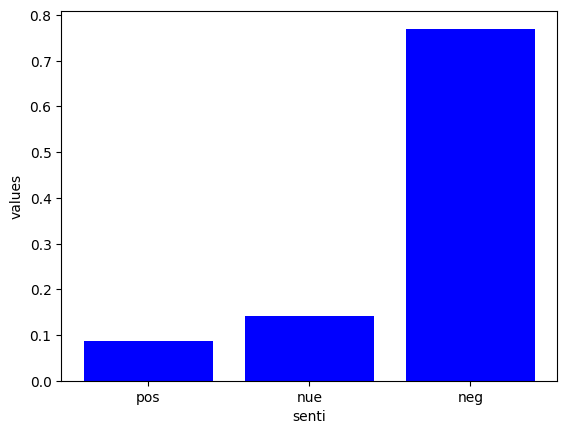

In [105]:
# 긍정부정중립 비율 그래프

plt.bar(['pos','nue','neg'], [pos,nue,neg], color='blue')

plt.xlabel('senti')
plt.ylabel('values')

# 그래프 보여주기
plt.show()

-- tsla 주가 데이터 추가 --

In [102]:
!pip install yfinance
!pip install -U pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 83.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=0db20b8b6b1d251d172af7ea5bd10e69fe7188983278733c26e3ba13d562ec35
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting unin

In [106]:
import yfinance as yf

In [107]:
tsla_df = yf.download('TSLA', start='2019-12-31', end='2022-12-31')

[*********************100%%**********************]  1 of 1 completed


In [109]:
tsla_df['Date'] = tsla_df.index.strftime('%Y-%m-%d')

In [110]:
tsla_df

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2019-12-31,27.000000,28.086000,26.805332,27.888666,27.888666,154285500,2019-12-31
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,2020-01-02
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,2020-01-03
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,2020-01-06
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,2020-01-07
...,...,...,...,...,...,...,...
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,2022-12-23
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,2022-12-27
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,2022-12-28


In [162]:
# 해당 영업일의 종가 변동 비율(전일 대비)
tsla_df['Close_ratio'] = tsla_df['Close'].pct_change()
tsla_df.head()

,Open,High,Low,Close,Adj Close,Volume,Date,transaction_amount,transaction_ratio,Close_ratio
Date,,,,,,,,,,
2019-12-31,27.000000,28.086000,26.805332,27.888666,27.888666,154285500,2019-12-31,4.302817e+09,NaN,NaN
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,2020-01-02,4.101281e+09,-0.046838,0.028518
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,2020-01-03,7.876053e+09,0.920388,0.029633
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,2020-01-06,4.575455e+09,-0.419068,0.019255
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,2020-01-07,8.387778e+09,0.833212,0.038801


In [119]:
# 날짜 - senti
# print(senti_df)
# senti_df.set_index('Date', inplace=True)
senti_df.drop('Keywords_Sentiment_Score',axis = 1)


,Description_Sentiment_Score
Date,
2020.01.01,1
2020.01.02,-3
2020.01.03,-4
2020.01.04,-1
2020.01.05,-5
...,...
2023.08.09,0
2023.08.31,0
2023.11.16,0


In [187]:
senti_df.index = pd.to_datetime(senti_df.index)

result_a = pd.merge(tsla_df, senti_df, left_index=True, right_index=True, how='inner')
# result_a

result_a = result_a.sort_index()

In [164]:
result_a

,Open,High,Low,Close,Adj Close,Volume,Date,transaction_amount,transaction_ratio,Close_ratio,Description_Sentiment_Score,Keywords_Sentiment_Score
Date,,,,,,,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,2020-01-02,4.101281e+09,-0.046838,0.028518,-3,0
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,2020-01-03,7.876053e+09,0.920388,0.029633,-4,0
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,2020-01-06,4.575455e+09,-0.419068,0.019255,-3,1
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,2020-01-07,8.387778e+09,0.833212,0.038801,-2,0
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,2020-01-08,1.532736e+10,0.827344,0.049205,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,2022-12-23,2.056478e+10,-0.219103,-0.017551,-9,-1
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,2022-12-27,2.276299e+10,0.106892,-0.114089,-4,-2
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,2022-12-28,2.491686e+10,0.094621,0.033089,-7,-1


<Figure size 1000x500 with 0 Axes>

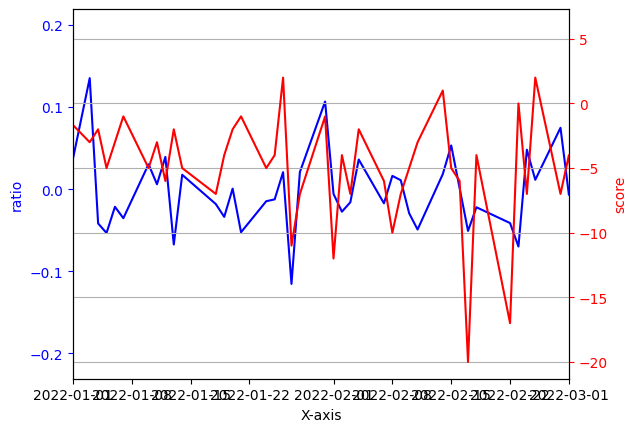

In [261]:
# close_ratio / transaction_ratio

plt.figure(figsize=(10, 5))

# 첫 번째 Y 축에 데이터 플로팅
fig, ax1 = plt.subplots()
ax1.plot(result_a.index.tolist(), result_a['Close_ratio'], 'b-', label='sin(x)')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('ratio', color='b')
ax1.tick_params('y', colors='b')

# 두 번째 Y 축 생성
ax2 = ax1.twinx()
ax2.plot(result_a.index.tolist(), result_a['Description_Sentiment_Score'], 'r-', label='cos(x)')
ax2.set_ylabel('score', color='r')
ax2.tick_params('y', colors='r')

plt.xlim(pd.Timestamp('2022-01-01'),pd.Timestamp('2022-03-01'))

plt.grid(True)
plt.show()

---

In [185]:
###
result_a
grouped_data

,Sentences
Date,
2020.01.01,Tesla Cybertruck Makes Music Video Debut CarB...
2020.01.02,Tesla may have been on Autopilot in California...
2020.01.03,"Tesla to provide movies, online games in its c..."
2020.01.04,I-70 crash one of 3 raising questions about Te...
2020.01.05,Minimalist Tesla Cybertruck Inspires Russian '...
...,...
2023.08.09,9 Mejores Brokers España para Invertir en Bols...
2023.08.31,EV Tax Credit 2023: Everything You Need to Kno...
2023.11.16,Europas Silvesterfluchten: Ruhige Ziele zum Ja...


In [207]:

from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [193]:
result_a.index = pd.to_datetime(result_a.index)
grouped_data.index = pd.to_datetime(grouped_data.index)

# result_a

ddd = result_a.join(grouped_data, how='inner')
ddd

,Open,High,Low,Close,Adj Close,Volume,Date,transaction_amount,transaction_ratio,Close_ratio,Description_Sentiment_Score,Keywords_Sentiment_Score,Sentences
Date,,,,,,,,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,2020-01-02,4.101281e+09,-0.046838,0.028518,-3,0,Tesla may have been on Autopilot in California...
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,2020-01-03,7.876053e+09,0.920388,0.029633,-4,0,"Tesla to provide movies, online games in its c..."
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,2020-01-06,4.575455e+09,-0.419068,0.019255,-3,1,Fisker Ocean 2022 detailed: Electric SUV targe...
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,2020-01-07,8.387778e+09,0.833212,0.038801,-2,0,China could be the 'swing factor' for Tesla's ...
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,2020-01-08,1.532736e+10,0.827344,0.049205,-1,0,Queensland's First Community-Scale Battery Pro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,2022-12-23,2.056478e+10,-0.219103,-0.017551,-9,-1,New California law effectively bans Tesla from...
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,2022-12-27,2.276299e+10,0.106892,-0.114089,-4,-2,Why Tesla Stocks Dropped So Much in 2022 TIME...
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,2022-12-28,2.491686e+10,0.094621,0.033089,-7,-1,Bus und Bahn in Oberhavel: Weniger Zulassungen...


In [202]:
ddd.isnull().sum()

Open                           0
High                           0
Low                            0
Close                          0
Adj Close                      0
Volume                         0
Date                           0
transaction_amount             0
transaction_ratio              0
Close_ratio                    0
Description_Sentiment_Score    0
Keywords_Sentiment_Score       0
Sentences                      0
dtype: int64

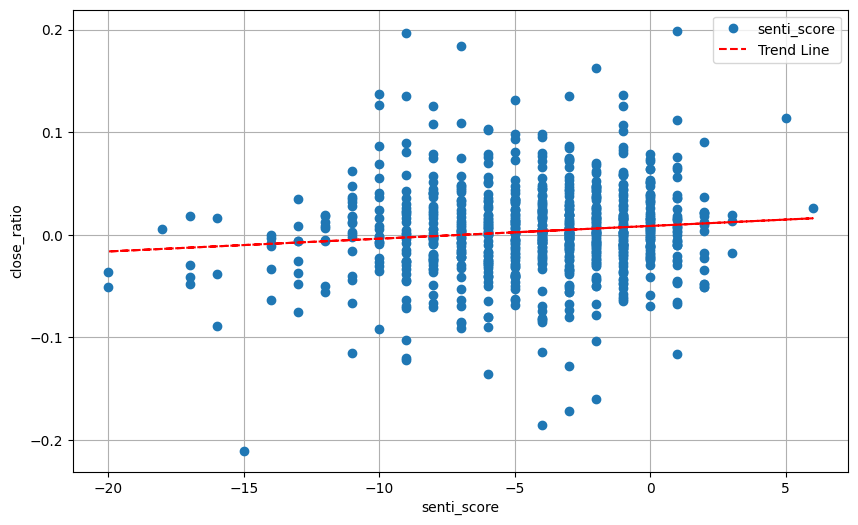

In [257]:
plt.figure(figsize=(10, 6))
plt.plot(ddd['Description_Sentiment_Score'], ddd['Close_ratio'], marker='o', linestyle='', label='senti_score')

# 추세선 계산 및 시각화
coefficients = np.polyfit(ddd['Description_Sentiment_Score'], ddd['Close_ratio'], 1)  # 다항식 회귀 모델의 계수를 추정, 1: 선형 회귀 모형, 2: 이차 다항식 회귀모형
trend_line = np.poly1d(coefficients)  #일차원(1d) 추세선 함수로서 다항식의 계수를 입력받아 다항식 객체를 반환

plt.plot(ddd['Description_Sentiment_Score'], trend_line(ddd['Description_Sentiment_Score']), color='red', linestyle='--', label='Trend Line')

plt.xlabel('senti_score')
plt.ylabel('close_ratio')
plt.legend()
plt.grid(True)
plt.show()

In [256]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# 선형 회귀 모델 생성
X = ddd['Description_Sentiment_Score']
y = ddd['Close_ratio']

X = sm.add_constant(X)  # 상수항 추가
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Close_ratio   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     8.697
Date:                Wed, 29 Nov 2023   Prob (F-statistic):            0.00329
Time:                        20:03:14   Log-Likelihood:                 1269.0
No. Observations:                 756   AIC:                            -2534.
Df Residuals:                     754   BIC:                            -2525.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             